<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/pandas_logo.png" alt="Drawing" style="width:900px;">



# <center> 02. Pandas Introduction! </center>



## <span style="color:red"> Outline </span>
1. **Pandas Introduction**
2. **Pandas DataFrames and DataSeries**
3. **Plotting with matplotlib and pandas**


## <span style="color:red"> 1. Pandas Introduction </span>

[*Pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API that provides high-performance, easy-to-use data structures and data analysis.

Among main pandas features, are:
* Access and manipulate data within a `DataFrame` and `Series`  data structures
* Allows import CSV data into a *pandas* `DataFrame`
* Allows reindex a `DataFrame` to shuffle data

***see more tutorials at https://pandas.pydata.org/pandas-docs/stable/tutorials.html***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__

'1.5.3'

## <span style="color:green"> If you are in colaboratoy </span>:

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/ai-uis-student/notebooks
!pwd

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/My Drive/ai-uis-student/notebooks'
/content
/content


The main data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.
  
---

## <span style="color:red"> 2. DataFrame and series </span>
  
  
  
The data frame is used for data manipulation like in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html). `DataFrame` objects can be created by passing a `dict` mapping `string` column names to `Series` objects, for instance:

In [ ]:
city_names = pd.Series(['Bucaramanga', 'Bogotá', 'Málaga'])
population = pd.Series([1524690, 10157850, 10000])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,Bucaramanga,1524690
1,Bogotá,10157850
2,Málaga,10000


## Loading and inspecting

But typically the DataFrame load data from external entire files. The files can have millions of data that can be manipulated with pandas using Dataframes. For instance:

In [ ]:
#california_housing_dataframe = pd.read_csv
#("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
d = pd.read_csv("../data/california_housing_train.csv")
type(d)

pandas.core.frame.DataFrame

DataFrame.head  displays the first few records of a DataFrame:

In [ ]:
d.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


In [ ]:
d.columns, d.shape

(Index([u'longitude', u'latitude', u'housing_median_age', u'total_rooms',
        u'total_bedrooms', u'population', u'households', u'median_income',
        u'median_house_value'],
       dtype='object'), (17000, 9))

`DataFrame.describe` to show interesting statistics about a DataFrame

In [ ]:
d.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A powerful feature of *pandas* is graphing. For example, `DataFrame.hist`  shows the distribution of values in a column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a3df937d0>]], dtype=object)

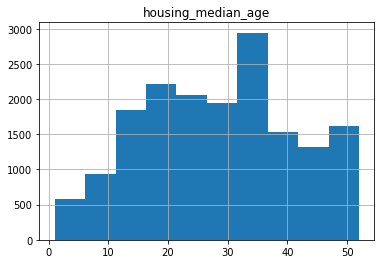

In [ ]:
d.hist('housing_median_age')

In [ ]:
d["median_house_value"].head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [ ]:
#acces to a specific range of data
d[1000:1015]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1000,-117.1,33.36,19.0,3518.0,658.0,2091.0,610.0,3.2614,168800.0
1001,-117.1,33.17,12.0,2465.0,412.0,1226.0,428.0,5.4819,183800.0
1002,-117.1,33.15,5.0,3159.0,685.0,1398.0,581.0,3.1467,161100.0
1003,-117.1,33.14,7.0,10665.0,2576.0,4917.0,2424.0,2.3171,159500.0
1004,-117.1,33.12,12.0,961.0,342.0,315.0,201.0,0.8130,275000.0
1005,-117.1,33.00,5.0,15502.0,2613.0,7417.0,2358.0,5.9094,261100.0
1006,-117.1,32.97,17.0,3167.0,861.0,2098.0,828.0,2.4459,85800.0
1007,-117.1,32.96,7.0,3619.0,770.0,1134.0,482.0,4.1279,167600.0
1008,-117.1,32.90,16.0,2994.0,445.0,1047.0,437.0,5.1490,184300.0
1009,-117.1,32.83,16.0,4214.0,744.0,1820.0,699.0,4.3783,179500.0


In [ ]:
#acces to a particular data
d["median_house_value"][500]

154600.0

In [ ]:
type(d), type(d["median_house_value"])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
#to obtain only values to a easy processing
d["population"].unique()

array([ 1015.,  1129.,   333., ...,  1899.,   516.,  3546.])

In [ ]:
d["median_house_value"].unique()

array([  66900.,   80100.,   85700., ...,  119700.,   75100.,   80500.])

In [ ]:
d["median_house_value"].dtype, d["population"].dtype, d["latitude"].dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [ ]:
d.index

RangeIndex(start=0, stop=17000, step=1)

In [ ]:
d[["population", "median_house_value"]].head()

,population,median_house_value
0,1015.0,66900.0
1,1129.0,80100.0
2,333.0,85700.0
3,515.0,73400.0
4,624.0,65500.0


**More and more information about the dataset can be easily obtained with Pandas**

In [ ]:
# get the description of data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


## fixing data

In [ ]:
d.columns

Index([u'longitude', u'latitude', u'housing_median_age', u'total_rooms',
       u'total_bedrooms', u'population', u'households', u'median_income',
       u'median_house_value'],
      dtype='object')

In [ ]:
#to add a new column in the dataset
d["new"] = population
d.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1524690.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,10000.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,NaN
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,NaN
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,NaN
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,NaN
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,NaN
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,NaN
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,NaN


In [ ]:
#very important to clean values.
for col in d.columns:
    print col, np.sum(pd.isnull(d[col]))

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
new 16997


In [ ]:
#Fill NA/NaN values using the specified method
d.new.fillna(population.mean(), inplace=True)

In [ ]:
d.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.524690e+06
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1.015785e+07
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,1.000000e+04
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.897513e+06
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,3.897513e+06
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,3.897513e+06
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,3.897513e+06
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,3.897513e+06
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,3.897513e+06
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,3.897513e+06


## Filtering data by boolean index

In [ ]:
d[d.population>15000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
2274,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,3.897513e+06
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,3.897513e+06
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,3.897513e+06
3296,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,3.897513e+06
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,3.897513e+06


In [ ]:
 d[(d.population>15000) & (d.housing_median_age<14)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,3.897513e+06
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,3.897513e+06
3296,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,3.897513e+06
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,3.897513e+06


## Indexes
 Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row. Once created they do not change when data is reordered.

In [ ]:
print(d.index)
print(type(d))

RangeIndex(start=0, stop=17000, step=1)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(population.index)
print(type(population))
population

RangeIndex(start=0, stop=3, step=1)
<class 'pandas.core.series.Series'>


0     1524690
1    10157850
2       10000
dtype: int64

 to manually reorder the rows.

In [ ]:
d.reindex([2, 0, 1])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,10000.0
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1524690.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10157850.0


Reindexing is a great way to shuffle (randomize) a DataFrame

In [ ]:
import numpy as np
d.reindex(np.random.permutation(d.index)).head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
13238,-121.91,39.03,48.0,1096.0,218.0,657.0,199.0,2.7841,65800.0,3.897513e+06
14080,-122.06,37.99,17.0,1319.0,316.0,384.0,269.0,1.8229,137500.0,3.897513e+06
9651,-119.50,36.74,20.0,1089.0,208.0,531.0,212.0,4.5938,106900.0,3.897513e+06
16465,-122.61,38.23,18.0,2042.0,420.0,914.0,400.0,2.9871,193800.0,3.897513e+06
12525,-121.64,40.90,24.0,2237.0,434.0,834.0,318.0,1.7538,90300.0,3.897513e+06


In [ ]:
#sor values
d.sort_values(by="housing_median_age").head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new
13708,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,3.897513e+06
10993,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,3.897513e+06
1353,-117.17,34.12,2.0,3867.0,573.0,1275.0,433.0,5.4138,164400.0,3.897513e+06
8765,-118.61,34.38,2.0,5989.0,883.0,1787.0,613.0,6.6916,329500.0,3.897513e+06
8672,-118.56,34.42,2.0,966.0,270.0,233.0,169.0,1.9667,450000.0,3.897513e+06


In [ ]:
#remove columns
del d['new']
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## <span style="color:red"> 3. Plotting with matplotlib and pandas </span>

#### Time series and Plotting

In [ ]:
d.rolling(3).mean().head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-114.446667,34.093333,17.000000,4660.666667,1119.333333,825.666667,350.666667,1.654833,77566.666667
3,-114.533333,33.910000,16.666667,3290.333333,804.000000,659.000000,268.666667,2.220867,79733.333333
4,-114.566667,33.633333,17.000000,1225.000000,279.000000,490.666667,201.666667,2.255867,74866.666667
5,-114.573333,33.613333,21.000000,1447.333333,299.666667,603.333333,242.333333,2.820167,70966.666667
6,-114.576667,33.603333,24.666667,1916.000000,414.000000,1045.333333,378.000000,2.648533,73966.666667
7,-114.583333,34.023333,31.666667,1702.000000,361.333333,962.333333,343.333333,2.576300,68300.000000
8,-114.586667,34.016667,33.333333,2836.000000,674.333333,1783.333333,615.666667,2.187767,63100.000000
9,-114.593333,34.423333,40.333333,2366.000000,550.666667,1432.000000,495.000000,2.025767,51666.666667


## Go to other dataset to see more functionalities of pandas

Now, we are use a more specific dataset to see the pandas funtionalities in time. To see much better this kind of functionalities we will use a new dataset.

Vamos a usar la recolección de un indice climático **AO (Oscilación Ártica)**, used to describe the states and climate changes.

* Positive **AO+** when pressure differences is high,  the western winds from the Atlantic are intense over Europe and run through high latitudes, providing mild winters (inviernos templados) to the continent

* Negative **AO-** when pressure differences is low, winters very cool...like in game of thrones!


<img src="../imgs/aonao.png" style="width:500px;">

We will convert in a pandas serie structure with monthly frequency

In [ ]:
ao = np.loadtxt('../data/monthly_ao.txt')
print(ao.shape)
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates

(823, 3)


DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='M')

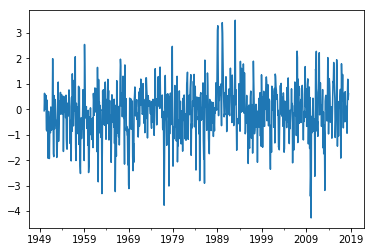

In [ ]:
AO = pd.Series(ao[:,2], index=dates)
AO.head()
AO.plot()

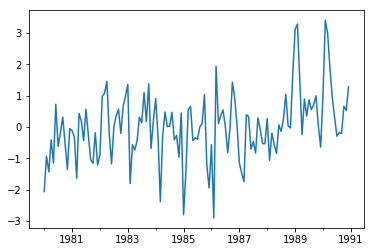

In [ ]:
AO['1980':'1990'].plot()

In [ ]:
AO.rolling(3).mean().head(10)

1950-01-31         NaN
1950-02-28         NaN
1950-03-31    0.186124
1950-04-30    0.391261
1950-05-31    0.206183
1950-06-30    0.388416
1950-07-31   -0.064111
1950-08-31   -0.371640
1950-09-30   -0.431840
1950-10-31   -0.290647
Freq: M, dtype: float64

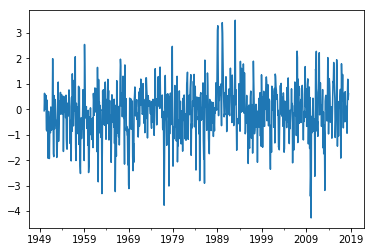

In [ ]:
AO.plot()

In [ ]:
#SELECTING BY YEAR
AO['1960']

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

Pandas provide easy way to resample data to different time frequency.

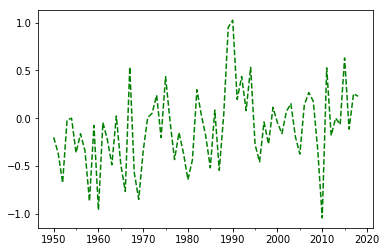

In [ ]:
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')

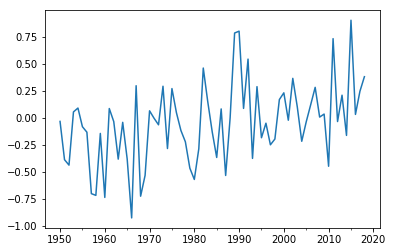

In [ ]:
AO_mm = AO.resample("A").median()
AO_mm.plot()

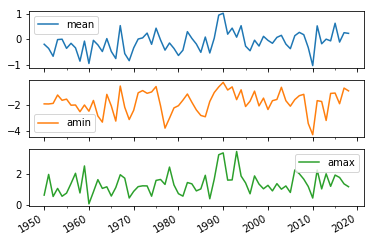

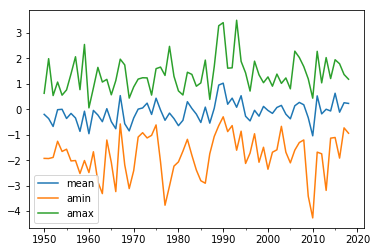

In [ ]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

oversampling

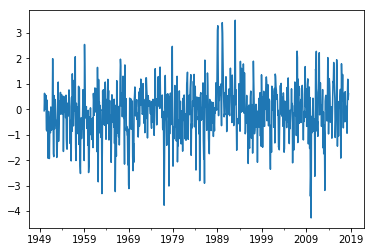

In [ ]:
AO_res =AO.resample(pd.Timedelta("12h")).fillna(method="pad").head()
AO.plot()

In [ ]:
AO.head()

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: M, dtype: float64

## Building from different files

In [ ]:
nao = np.loadtxt('../data/monthly_anao.txt')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')

ao = np.loadtxt('../data/monthly_ao.txt')
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

AO = pd.Series(ao[:,2], index=dates)
NAO = pd.Series(nao[:,2], index=dates_nao)
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31'],
              dtype='datetime64[ns]', length=823, freq='M')

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


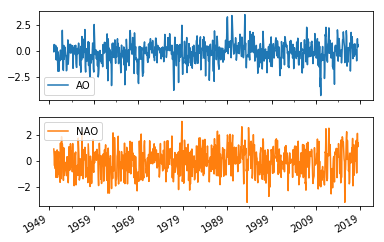

In [ ]:
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})
aonao.plot(subplots=True)

aonao.head()

We can simply add column to the Data Frame:

In [ ]:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


Rolling mean:

In [ ]:
del aonao['Diff']

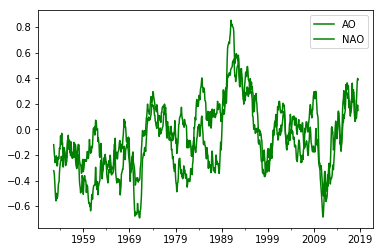

In [ ]:
aonao.rolling(window=32, center=False).mean().plot(style='-g')

,AO,NAO
AO,1.000000,0.604537
NAO,0.604537,1.000000


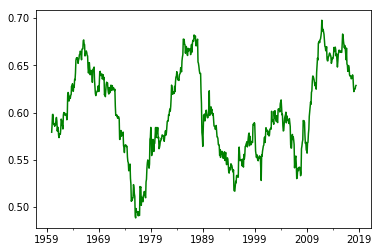

In [ ]:
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-g')
aonao.corr()


## Building from arrays or lists

In [ ]:
a = np.random.randint(10,size=(20,5))
a

array([[2, 9, 2, 8, 7],
       [9, 4, 2, 6, 6],
       [2, 4, 2, 9, 5],
       [6, 8, 9, 4, 7],
       [8, 4, 1, 5, 2],
       [3, 7, 3, 0, 5],
       [6, 4, 5, 7, 7],
       [0, 6, 0, 5, 4],
       [8, 0, 6, 1, 5],
       [0, 5, 6, 0, 7],
       [9, 8, 2, 1, 0],
       [0, 5, 6, 4, 7],
       [8, 6, 4, 4, 3],
       [0, 5, 5, 1, 6],
       [2, 1, 0, 9, 3],
       [0, 5, 0, 5, 7],
       [0, 0, 9, 2, 7],
       [0, 2, 8, 5, 0],
       [8, 8, 2, 4, 9],
       [7, 5, 4, 4, 4]])

In [ ]:
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k

,uno,dos,tres,cuatro,cinco
10,2,9,2,8,7
11,9,4,2,6,6
12,2,4,2,9,5
13,6,8,9,4,7
14,8,4,1,5,2
15,3,7,3,0,5
16,6,4,5,7,7
17,0,6,0,5,4
18,8,0,6,1,5
19,0,5,6,0,7


## More about plotting

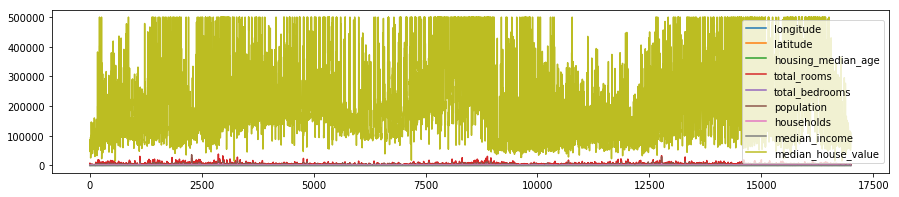

In [ ]:
d.plot(figsize=(15,3))

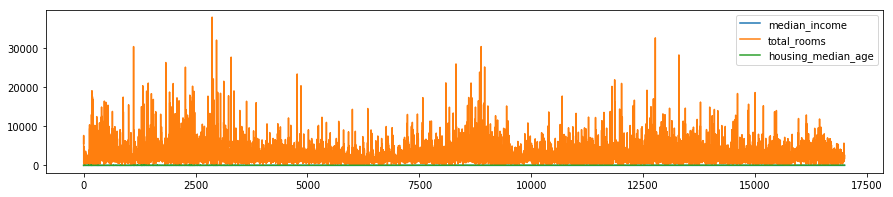

In [ ]:
attributes = [ "median_income", "total_rooms", "housing_median_age"]
d[attributes].plot(figsize=(15,3))
#pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

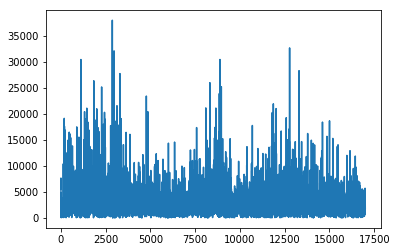

In [ ]:
d.total_rooms.plot()

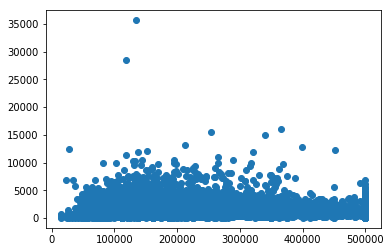

In [ ]:
plt.scatter(d.median_house_value, d.population)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f33d33d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f33afb0d0>]], dtype=object)

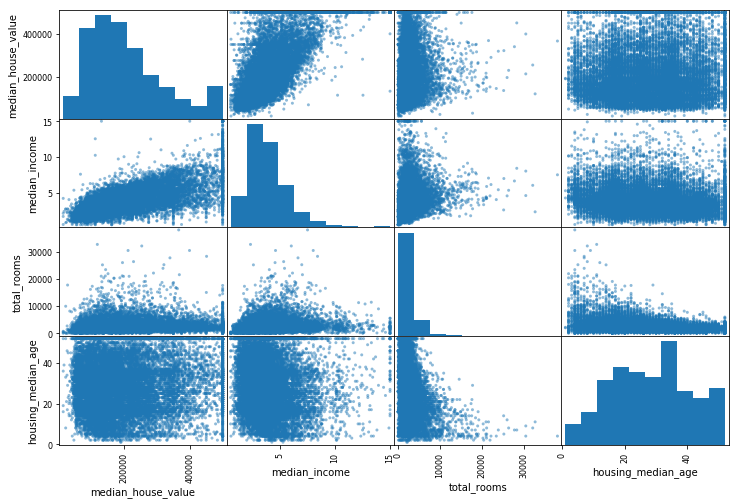

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

#pd.plotting.scatter_matrix(d, figsize=(10,10));

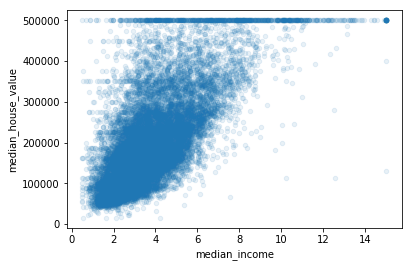

In [ ]:
d.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


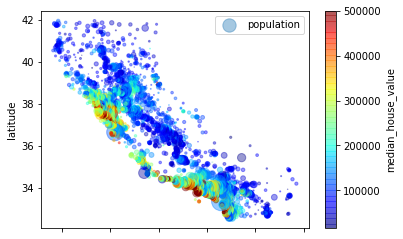

In [ ]:
d.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=d["population"]/100,
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
d.head()

## grouping

In [ ]:
aonao["month"] = [i.month for i in aonao.index]
aonao.head()

,AO,NAO,month
1950-01-31,-0.060310,0.92,1
1950-02-28,0.626810,0.40,2
1950-03-31,-0.008127,-0.36,3
1950-04-30,0.555100,0.73,4
1950-05-31,0.071577,-0.59,5


In [ ]:
aonao.groupby("month").max()

,AO,NAO
month,,
1,3.49530,1.7887
2,3.40160,2.0000
3,2.99000,1.8500
4,2.27480,2.4775
5,1.39110,2.6300
6,1.60630,1.6000
7,0.86555,1.9000
8,1.09780,1.9200
9,1.27830,2.0700


In [ ]:
aonao.groupby("month").count()

,AO,NAO
month,,
1,69,69
2,69,69
3,69,69
4,69,69
5,69,69
6,69,69
7,69,69
8,68,68
9,68,68


## Referencias

[1] official panda doc sites:http://pandas.pydata.org/pandas-docs/stable/index.html

[2] Description of a dataset: https://www.kaggle.com/camnugent/california-housing-prices